Student: Jennifer Lee


# Project overview:
Utilizing a dataset: **[Most Streamed Spotify Songs 2023]** to answer and analyze Business Questions

Needed criteria:
* Problem Identification + Data Collection
*   Derive Analytical Questions
* Collecting relevant data
* Coming up with analytical Questions related to dataset
* Collecting relevant data from dataset
* Data loading, cleaning, preprocessing, aggregating.
* Using 4 different types of visualizations
    * Histogram, Line charts, Bar Charts, Scatter Plots, etc.
* Did not implement regression modeling for this project.
Project report link: https://docs.google.com/document/d/1iDREQXqZjm5X1nTkBqdq8cpvG8ZWx7I8c8givdY0xtA/edit




# **Overarching Business Problem:** Analyze trends and patterns in Spotify Data to understand user preferences and optimize Spotify's machine learning music recommendations.

General Analytical Questions:
 * What are the top 10 most popular songs of 2023?
 * Who are the top 10 artists of 2023?
 * What is the typical tempo range of songs in the dataset?
 * Streams Vs. Year Released : Are there any trends?
 * Is there any trends throughout the months with streaming?


In [ ]:
#Importing needed libraries to start project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install chardet

In [ ]:
import chardet
#errors with encoding. using chardet to fix.

In [ ]:
with open('/content/spotify-2023.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df_spotify = pd.read_csv('/content/spotify-2023.csv', encoding=encoding)

In [ ]:
df_spotify.head(10)
#Displaying first top 10 songs.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


# Data Inspection + Cleaning

In [ ]:
df_spotify.info()
#Data seems to be missing at in_shazam_charts (903)
#Data also seems to be missing at key (858)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df_spotify.isnull().sum()
#Missing values:
#In_shazam_charts: 50 missing
#Key: 95 missing.

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df_spotify_cleaned = df_spotify.dropna()

In [ ]:
#A long string is found in row 576. replaced with actual value on spotify.
df_spotify.at[576, 'streams'] = 245472912


In [ ]:
df_spotify_cleaned.info()
#Data is cleaned.

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


In [ ]:
print(df_spotify_cleaned['streams'].dtype)
#change streams from object to numeric.

object


In [ ]:
df_spotify_cleaned = df_spotify_cleaned.reset_index(drop=True)

In [ ]:
# Drop the rows containing the non-numeric value
df_spotify_cleaned = df_spotify_cleaned.drop(477)
df_spotify_cleaned = df_spotify_cleaned.drop(478)

In [ ]:
df_spotify_cleaned['streams'] = pd.to_numeric(df_spotify_cleaned['streams'])
#Dropped 477 and 478 to be able to analyze.

In [ ]:
df_spotify_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 816
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            815 non-null    object
 1   artist(s)_name        815 non-null    object
 2   artist_count          815 non-null    int64 
 3   released_year         815 non-null    int64 
 4   released_month        815 non-null    int64 
 5   released_day          815 non-null    int64 
 6   in_spotify_playlists  815 non-null    int64 
 7   in_spotify_charts     815 non-null    int64 
 8   streams               815 non-null    int64 
 9   in_apple_playlists    815 non-null    int64 
 10  in_apple_charts       815 non-null    int64 
 11  in_deezer_playlists   815 non-null    object
 12  in_deezer_charts      815 non-null    int64 
 13  in_shazam_charts      815 non-null    object
 14  bpm                   815 non-null    int64 
 15  key                   815 non-null    object


# Preprocessing: Encoding and Feature Scaling

In [ ]:
df_spotify_cleaned.columns
#Calling the columns for easier references.

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
artist_label_encoder = LabelEncoder()

In [ ]:
#encoding categorical spaces.
if 'artist' in df_spotify_cleaned.columns:
    # Encode the 'artist' category into numerical values
    df_spotify_cleaned['artist_encoded'] = artist_label_encoder.fit_transform(df_spotify_cleaned['artist'])

    # Drop the original categorical column
    df_spotify_cleaned.drop('artist', axis=1, inplace=True)

In [ ]:
#encoding mode and key as well
category_mode_mapping = {'Major': 0, 'Minor': 1}

df_spotify_cleaned['mode_encoded'] = df_spotify_cleaned['mode'].map(category_mode_mapping)



In [ ]:


# Initialize StandardScaler
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['danceability_%', 'energy_%',
                      'speechiness_%', 'acousticness_%', 'instrumentalness_%',
                      'liveness_%', 'valence_%','artist_count','released_day',
                      'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                      'in_deezer_charts','in_shazam_charts']

# Replace commas with an empty string and convert to numeric
df_spotify_cleaned[numerical_features] = df_spotify_cleaned[numerical_features].replace(',', '', regex=True)
df_spotify_cleaned[numerical_features] = df_spotify_cleaned[numerical_features].astype(float)

# Scale the numerical features
df_spotify_cleaned[numerical_features] = scaler.fit_transform(df_spotify_cleaned[numerical_features])

# Display the preprocessed dataset
df_spotify_cleaned.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_encoded
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",0.492818,2023,7,0.029340,553,147,141381703,-0.228178,...,B,Major,0.858188,1.601431,1.158480,0.182869,-0.191624,-0.750010,-0.639929,0
1,LALA,Myke Towers,-0.648224,2023,3,0.998746,1474,48,133716286,-0.161380,...,C#,Major,0.245316,0.416032,0.599768,-0.759170,-0.191624,-0.602381,-0.639929,0
2,vampire,Olivia Rodrigo,-0.648224,2023,6,1.752729,1397,113,140003974,0.453159,...,F,Major,-1.116622,-0.811702,-0.703894,-0.366654,-0.191624,0.947725,-0.444265,0
3,Cruel Summer,Taylor Swift,-0.648224,2019,8,0.998746,7858,100,800840817,0.747068,...,A,Major,-0.844234,0.289025,0.475610,-0.602164,-0.191624,-0.528567,0.436222,0
4,WHERE SHE GOES,Bad Bunny,-0.648224,2023,5,0.460187,3133,50,303236322,0.319563,...,A,Minor,-0.163265,-1.192723,0.972243,-0.484409,6.990064,-0.528567,-0.444265,1


# Summarizations and Aggregation.

In [ ]:
#Summary for cleaned and encoded dataset
df_spotify_cleaned.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_encoded
count,8.150000e+02,815.00000,815.000000,8.150000e+02,815.000000,815.000000,8.150000e+02,8.150000e+02,815.000000,8.150000e+02,...,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,815.000000
mean,4.141200e-17,2018.51411,6.022086,-3.487326e-17,4850.876074,11.750920,4.688656e+08,-8.718316e-18,0.000000,-1.307747e-17,...,-1.743663e-17,-2.005213e-16,-1.307747e-17,-3.051411e-17,-6.538737e-18,2.179579e-17,7.628526e-18,1.307747e-17,1.743663e-17,0.446626
std,1.000614e+00,10.70819,3.571936,1.000614e+00,7750.212435,18.631445,5.234367e+08,1.000614e+00,1.000614,1.000614e+00,...,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,0.497448
min,-6.482242e-01,1930.00000,1.000000,-1.370913e+00,31.000000,0.000000,2.762000e+03,-8.026374e-01,-0.999234,-3.215581e-01,...,-3.754126e-01,-2.042821e+00,-3.023334e+00,-1.997101e+00,-3.124980e+00,-1.033932e+00,-1.916236e-01,-1.119083e+00,-8.355923e-01,0.000000
25%,-6.482242e-01,2021.00000,3.000000,-9.400663e-01,829.000000,0.000000,1.342751e+08,-6.423231e-01,-0.878194,-3.107612e-01,...,-3.754126e-01,-8.366551e-01,-7.080404e-01,-8.117022e-01,-7.038936e-01,-8.376735e-01,-1.916236e-01,-6.023813e-01,-6.399286e-01,0.000000
50%,-6.482242e-01,2022.00000,5.000000,-7.837190e-02,2035.000000,3.000000,2.637790e+08,-3.751324e-01,-0.313342,-2.878718e-01,...,-3.558827e-01,-9.167034e-02,1.772190e-01,-7.324331e-03,1.031352e-01,-3.666537e-01,-1.916236e-01,-4.547521e-01,-4.442648e-01,0.000000
75%,4.928184e-01,2022.00000,9.000000,8.910343e-01,4882.500000,16.000000,6.014203e+08,2.394061e-01,0.695322,-1.989055e-01,...,-1.247794e-01,6.710521e-01,7.900909e-01,7.970535e-01,7.239265e-01,5.753858e-01,-1.916236e-01,3.941155e-01,1.427265e-01,1.000000
max,7.339074e+00,2023.00000,12.000000,1.860440e+00,52898.000000,147.000000,3.562544e+09,6.304634e+00,4.548420,1.036045e+01,...,9.070528e+00,2.959219e+00,1.947738e+00,1.940117e+00,2.027588e+00,2.773478e+00,1.018193e+01,5.819487e+00,5.229985e+00,1.000000


In [ ]:
#frequency distribution
df_spotify_cleaned.value_counts()

track_name                                    artist(s)_name            artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts  streams     in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm        key  mode   danceability_%  valence_%  energy_%   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  mode_encoded
'Till I Collapse                              Eminem, Nate Dogg          0.492818     2002           5                1.321881     22923                 0                  1695712020   0.239406           -0.071262         1.850776            -0.269741         -0.375413          1.717578  C#   Major  -0.844234       -1.743087   1.282639  -0.759170       -0.191624           -0.750010    0.925382      0               1
Rauw Alejandro: Bzrp Music Sessions, Vol. 56  Rauw Alejandro, Bizarrap   0.492818     2023           6                0.783322     871                   32          

In [ ]:
#Aggregating numerical columns
#Aggregating Streams
total_streams = df_spotify_cleaned['streams'].sum()
average_streams_per_track = df_spotify_cleaned['streams'].mean()
max_streams = df_spotify_cleaned['streams'].max()

total_streams

382125429011

In [ ]:
average_streams_per_track

468865557.06871164

In [ ]:
max_streams #highest streamed track?

3562543890

In [ ]:
#aggregated bpm
bpm_summary = df_spotify_cleaned['bpm'].describe()
bpm_summary

count    8.150000e+02
mean    -2.005213e-16
std      1.000614e+00
min     -2.042821e+00
25%     -8.366551e-01
50%     -9.167034e-02
75%      6.710521e-01
max      2.959219e+00
Name: bpm, dtype: float64

In [ ]:
#Aggregating categorical columns (mode, key)
mode_counts = df_spotify_cleaned['mode'].value_counts()
mode_counts

mode
Major    451
Minor    364
Name: count, dtype: int64

In [ ]:
key_counts = df_spotify_cleaned['key'].value_counts()
key_counts

key
C#    115
G      91
F      87
G#     85
D      78
B      76
A      70
F#     69
E      59
A#     55
D#     30
Name: count, dtype: int64

In [ ]:
songs_per_year = df_spotify_cleaned.groupby('released_year').size().reset_index(name='song_count')
songs_per_year
#Aggregated song count

,released_year,song_count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1957,1
5,1958,2
6,1959,2
7,1963,3
8,1970,1
9,1971,1


# **Answering the analysis goals.**

# Top 10 most streamed songs of 2023

In [ ]:
top_10_songs = df_spotify_cleaned.sort_values(by='streams', ascending=False).head(10)
#finding the top 10 songs

In [ ]:
top_10_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,mode_encoded
151,Shape of You,Ed Sheeran,-0.648224,2017,1,-0.832354,32181,10,3562543890,-0.361773,...,C#,Minor,1.062478,1.770774,0.041056,1.242664,-0.191624,-0.676196,-0.248601,1
36,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",0.492818,2018,10,-0.509219,24094,78,2808096550,4.167109,...,D,Major,0.585800,1.686103,-0.890131,1.085657,-0.191624,-0.823825,-0.542097,0
137,One Dance,"Drake, WizKid, Kyla",1.633861,2016,4,-1.047778,43257,24,2713922350,4.982040,...,C#,Major,0.653897,-0.642359,-0.083102,-0.994680,-0.191624,1.316798,-0.542097,0
71,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",0.492818,2021,7,-0.509219,17050,36,2665343922,5.770253,...,C#,Major,-0.571847,-0.134331,0.723927,-0.876925,-0.191624,-0.602381,-0.542097,0
122,Believer,Imagine Dragons,-0.648224,2017,1,1.860440,18986,23,2594040133,2.537246,...,A#,Minor,0.653897,0.966396,0.848085,-0.876925,-0.191624,0.357208,0.044895,1
611,Closer,"The Chainsmokers, Halsey",0.492818,2016,5,1.860440,28032,0,2591224264,3.405615,...,G#,Major,0.517703,0.543039,-0.765973,0.575386,-0.191624,-0.528567,-0.737760,0
41,Starboy,"The Weeknd, Daft Punk",0.492818,2016,9,0.783322,29536,79,2565529693,2.951391,...,G,Major,0.041025,-0.091996,-0.331419,-0.405905,-0.191624,-0.380938,1.708037,0
120,Perfect,Ed Sheeran,-0.648224,2017,1,-1.370913,16596,13,2559529074,-0.709121,...,G#,Major,-0.503750,-1.446737,-1.200527,-0.405905,-0.191624,-0.528567,-0.835592,0
583,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",0.492818,2019,6,0.567899,15010,2,2484812918,5.249231,...,A,Minor,0.585800,1.093403,-0.765973,-0.876925,-0.191624,-0.750010,-0.737760,1
283,Say You Won't Let Go,James Arthur,-0.648224,2016,9,-0.509219,15722,16,2420461338,2.283415,...,A#,Major,-1.865687,-0.261338,-0.517656,1.674432,-0.191624,-0.676196,-0.542097,0


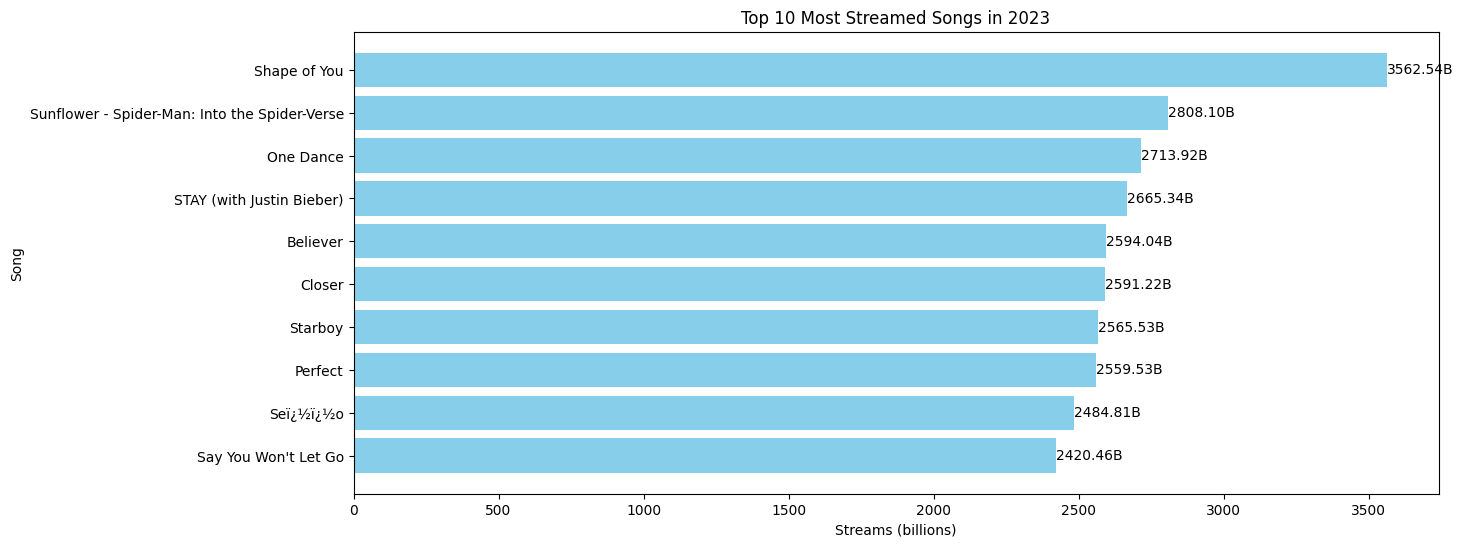

In [ ]:
# Convert streams to billions
streams_billions = top_10_songs['streams'] / 1_000_000

# Plotting the data
plt.figure(figsize=(14, 6))
plt.barh(top_10_songs['track_name'], streams_billions, color='skyblue')
plt.xlabel('Streams (billions)')
plt.ylabel('Song')
plt.title('Top 10 Most Streamed Songs in 2023')
plt.gca().invert_yaxis()  # Invert y-axis to display the song with the highest streams at the top

# Add value labels to the bars
for i, v in enumerate(streams_billions):
    plt.text(v + 0.1, i, f'{v:.2f}B', va='center')

plt.show()

# Top 10 most streamed songs of 2023:
1. Shape of you by Ed Sheeran (3.6B Streams)
2. Sunflower- Spider-man: into the Spider-Verse by Post Malone
3. One Dance by Drake, Wiz Kid, Kyla
4. Stay (With Justin Beiber) by Justin Beiber and The Kid Laroi
5. Believer by Imagine Dragons
6. Closer by The Chainsmokers, Halsey
7. Starboy by The Weeknd, Daft Punk
8. Perfect by  Ed Sheeran
9. Senorita by Shawn Mendes, Camila Cabello
10. Say you won't let go by James Arthur

# **Top 10 most popular artists of 2023: Bar graph**

In [ ]:
artist_streams = df_spotify_cleaned.groupby('artist(s)_name')['streams'].sum()

In [ ]:
top_10_artists = artist_streams.sort_values(ascending=False).head(10)

In [ ]:
top_10_artists

artist(s)_name
Taylor Swift       11851151082
Ed Sheeran         11051252012
Bad Bunny           8582384095
Eminem              6183805596
The Weeknd          6038640754
Harry Styles        6033490512
Imagine Dragons     5272484650
Adele               4508746590
SZA                 4197341485
Bruno Mars          4185733280
Name: streams, dtype: int64

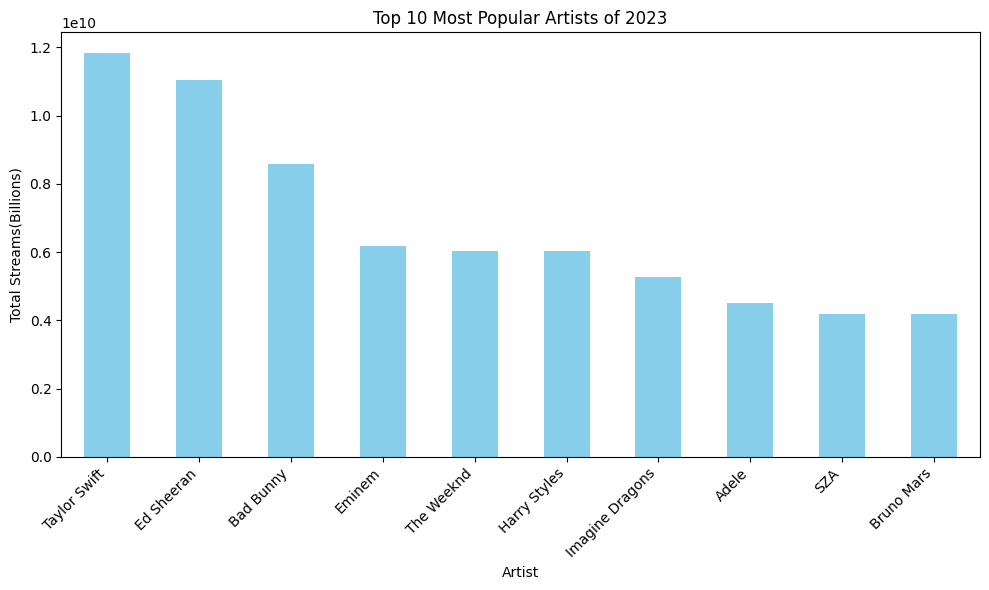

In [ ]:
top_10_artists = artist_streams.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Artists of 2023')
plt.xlabel('Artist')
plt.ylabel('Total Streams(Billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Artists of 2023
1. Taylor Swift
2. Ed Sheeran
3. Bad Bunny
4. Eminem
5. The Weeknd
6. Harry Styles
7. Imagine Dragons
8. Adele
9. SZA
10. Bruno Mars

# What is the typical tempo range of songs in the dataset?: Histogram

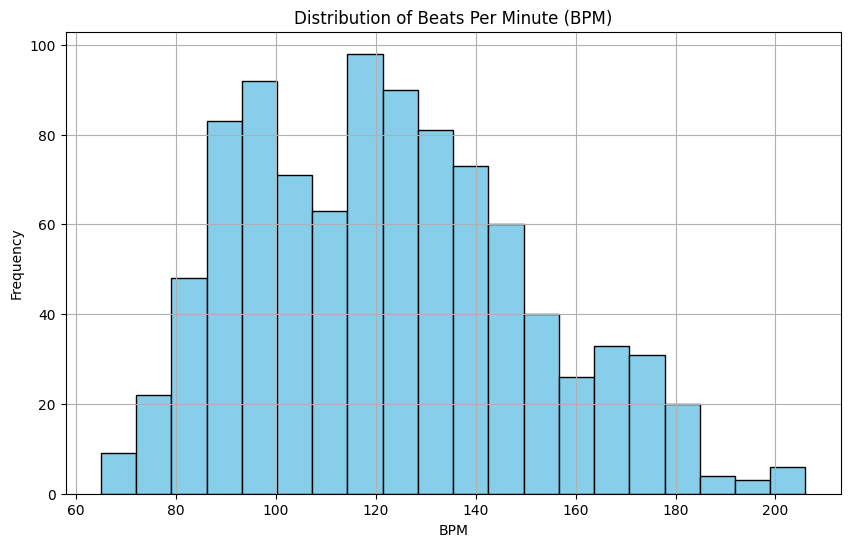

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_spotify['bpm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Beats Per Minute (BPM)')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Number of songs released each year: Linechart

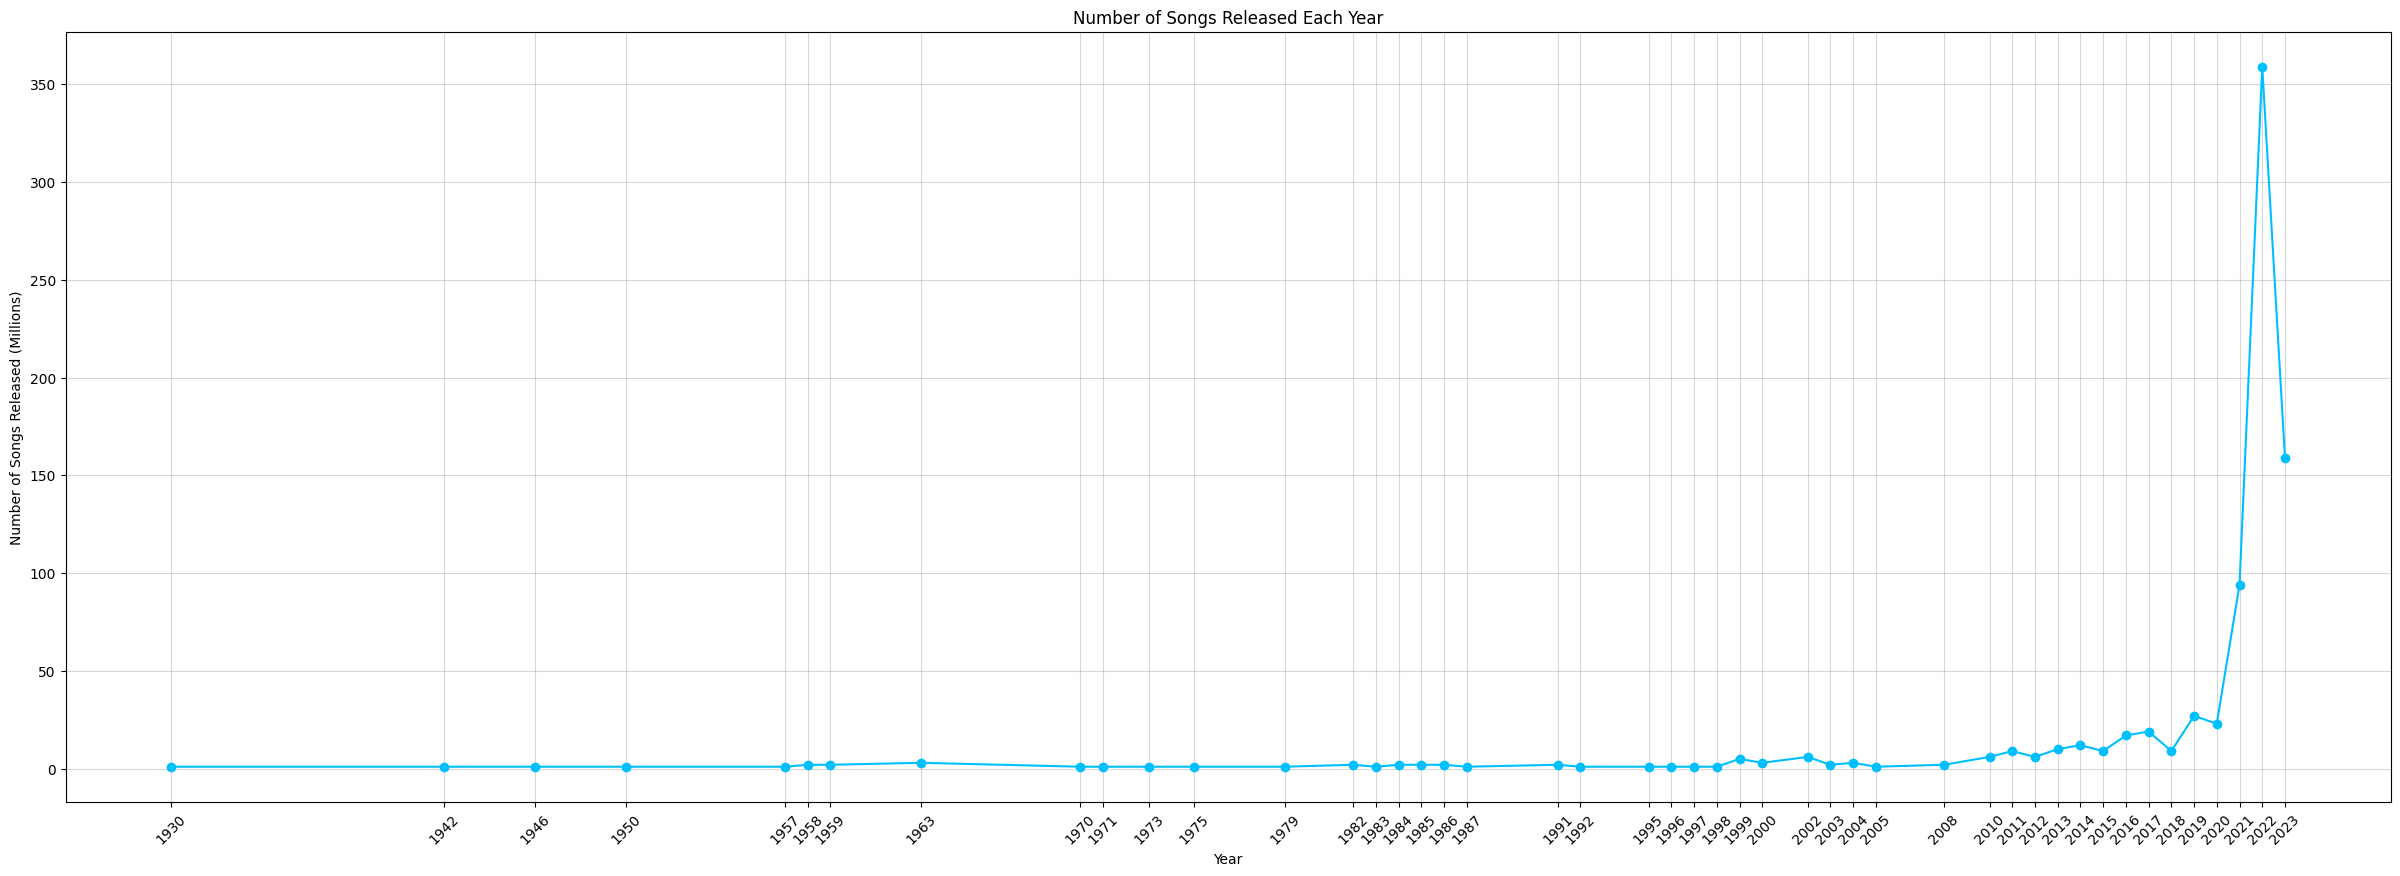

In [ ]:
# Group the data by 'released_year' and count the number of songs released each year
year_counts = df_spotify_cleaned['released_year'].value_counts().sort_index()

# Create a line chart to visualize the number of songs released each year
plt.figure(figsize=(30, 10))
plt.plot(year_counts.index, year_counts.values, marker='o', color='deepskyblue', linestyle='-')
plt.title('Number of Songs Released Each Year' )
plt.xlabel('Year')
plt.ylabel('Number of Songs Released (Millions)')
plt.grid(True, alpha=0.5)
plt.xticks(year_counts.index, rotation=45)
plt.show()

Analysis:
* Giant increase of released songs in 2021.
* Result of the Pandemic? Social Media?
* 2023: drops down (but note that the data cuts off from the 7th month).
*

# Streams Vs. Year Released: Scatterplot

In [ ]:
from scipy import stats
#A library that uses arrays and mathematical algorithms
#Used for the line of best fit.

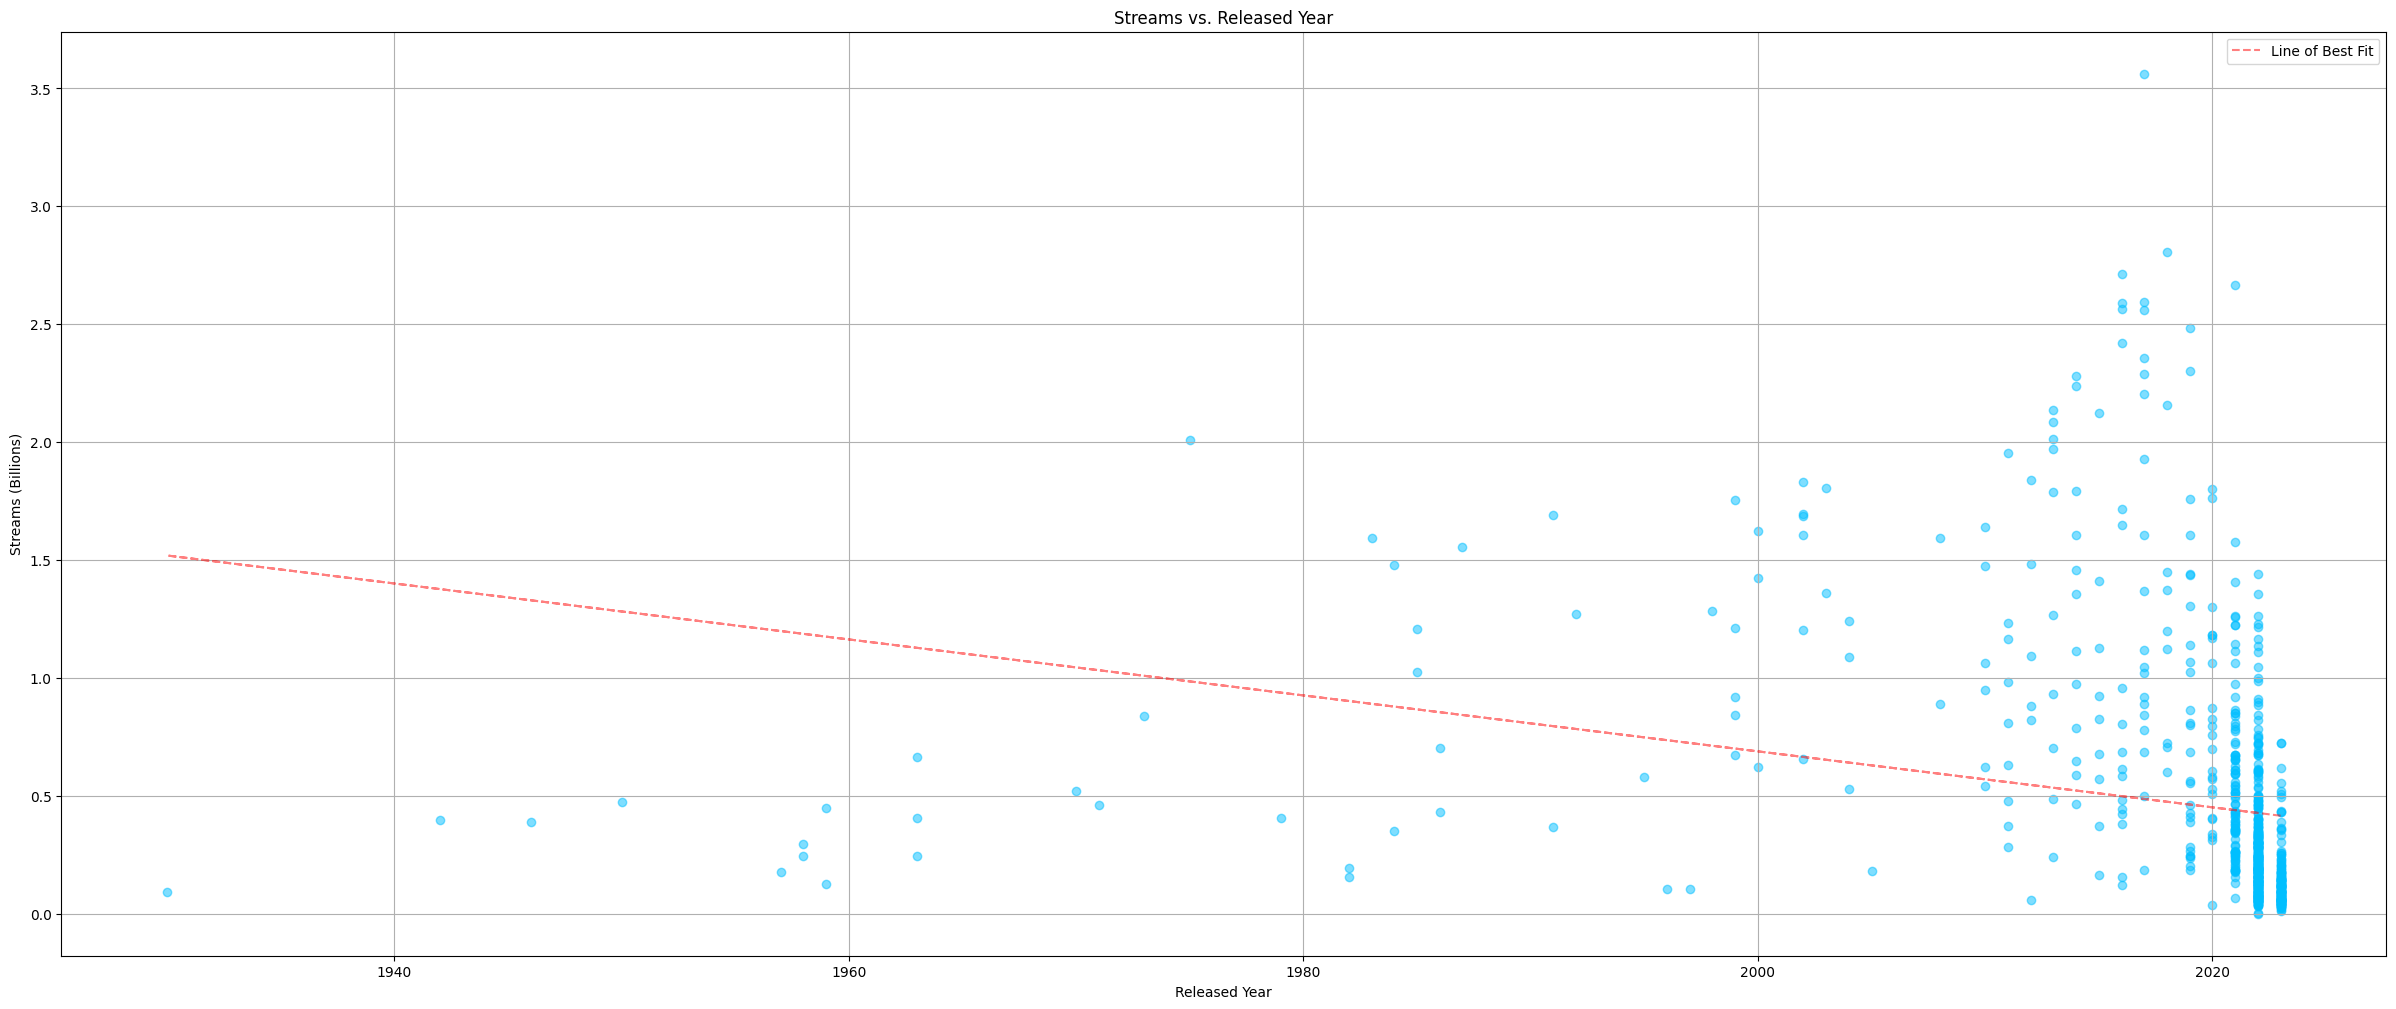

In [ ]:

# Create a scatter plot for 'Streams' vs. 'Released Year'
plt.figure(figsize=(30, 12))
plt.scatter(df_spotify_cleaned['released_year'], df_spotify_cleaned['streams'] / 1e9, color='deepskyblue', alpha=0.5)
plt.title('Streams vs. Released Year')
plt.xlabel('Released Year')
plt.ylabel('Streams (Billions)')
plt.grid(True)

slope, intercept, r_value, p_value, std_err = stats.linregress(df_spotify_cleaned['released_year'], df_spotify_cleaned['streams'] / 1e9)
line = slope * df_spotify_cleaned['released_year'] + intercept
plt.plot(df_spotify_cleaned['released_year'], line, color='red', linestyle='--', label='Line of Best Fit', alpha = 0.5)
plt.legend()
plt.show()

# More Zoomed in chart with recent years:

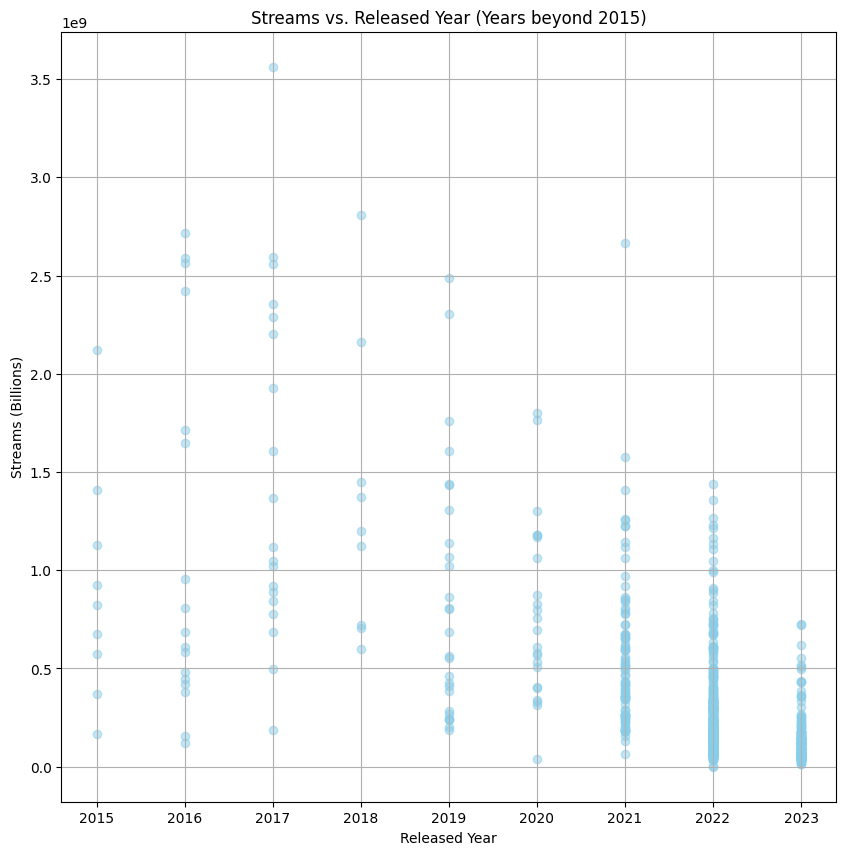

In [ ]:
# Filter the DataFrame to include only years beyond 2015
df_filtered = df_spotify_cleaned[df_spotify_cleaned['released_year'] > 2014]

# Create a scatter plot for 'Streams' vs. 'Released Year' for years beyond 2015
plt.figure(figsize=(10, 10))
plt.scatter(df_filtered['released_year'], df_filtered['streams'], color='skyblue', alpha=0.5)
plt.title('Streams vs. Released Year (Years beyond 2015)')
plt.xlabel('Released Year')
plt.ylabel('Streams (Billions)')
plt.grid(True)



Analysis:
* Downward line of best fit, but important to note that before the 2000s, very little songs were released.
* Near the 2020s (around 2021 specifically), more songs were released
* More songs overall could mean less streams for everything because of the volume.

Monthly trends? (2023)

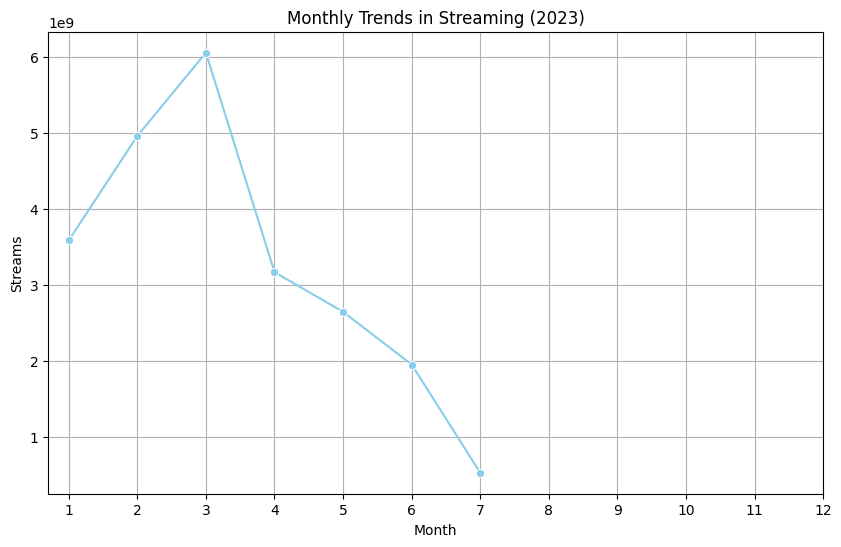

In [ ]:
# Filter the DataFrame to include only the year 2023
df_2023 = df_spotify_cleaned[df_spotify_cleaned['released_year'] == 2023]

# Group the filtered data by month and sum up the streaming counts for each month
monthly_streams_2023 = df_2023.groupby('released_month')['streams'].sum()

# Reset index to convert the series to a DataFrame with columns
monthly_streams_2023 = monthly_streams_2023.reset_index()

# Create a line chart to visualize the monthly trends in streaming for 2023
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_streams_2023, x='released_month', y='streams', marker='o', color='skyblue')
plt.title('Monthly Trends in Streaming (2023)')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.show()

Comparing the data from 2020 onward.

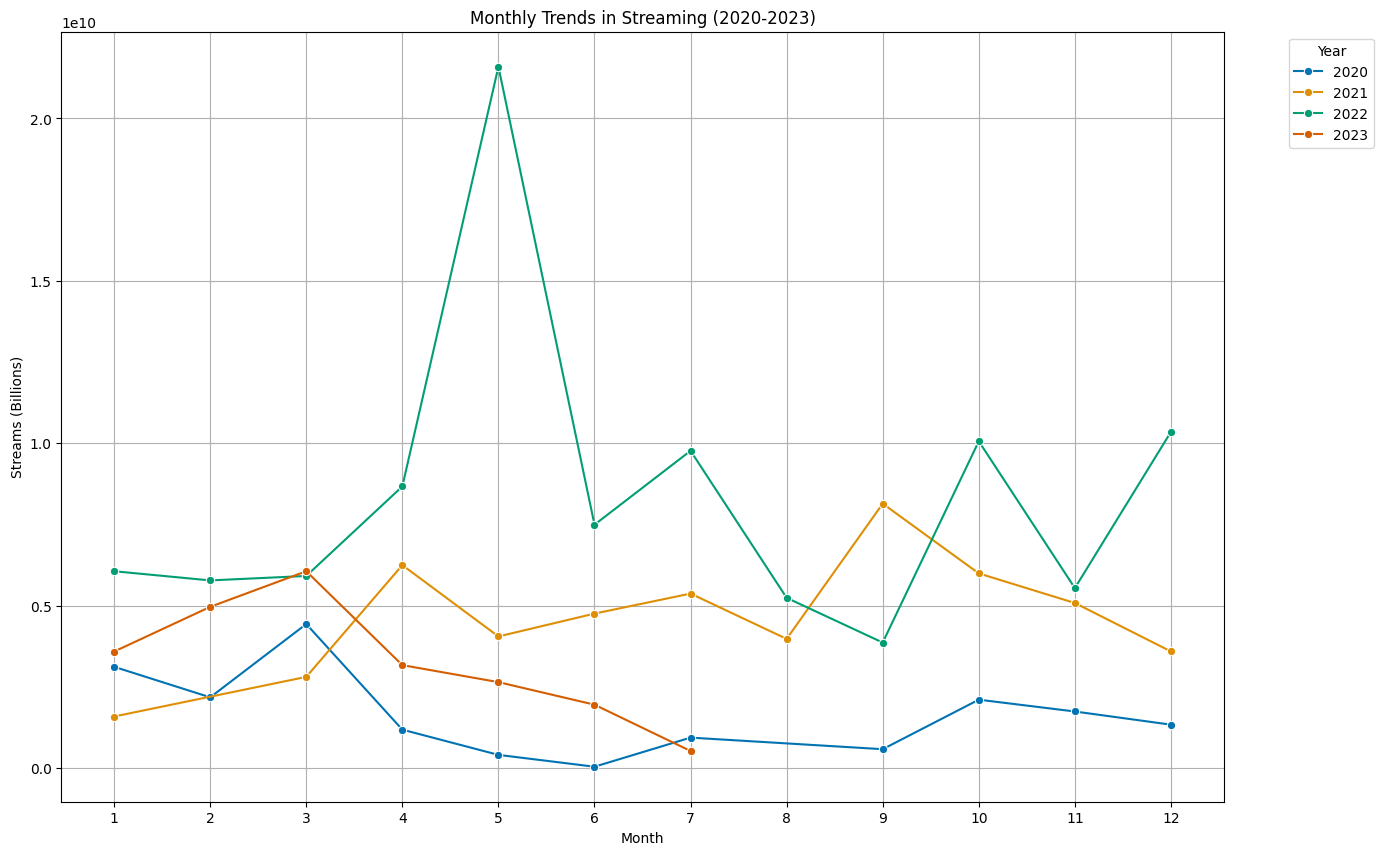

In [ ]:

# Filter the DataFrame to include only the years 2020, 2021, 2022, and 2023
df_filtered = df_spotify_cleaned[df_spotify_cleaned['released_year'].isin([2020, 2021, 2022, 2023])]

# Group the filtered data by year and month and sum up the streaming counts for each month
monthly_streams = df_filtered.groupby(['released_year', 'released_month'])['streams'].sum()

# Reset index to convert the multi-index to columns
monthly_streams = monthly_streams.reset_index()

# Create a line chart to visualize the monthly trends in streaming for each year
plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_streams, x='released_month', y='streams', hue='released_year', marker='o', palette='colorblind')
plt.title('Monthly Trends in Streaming (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Streams (Billions)')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Analysis**:
* 2022 seems to have a higher than average streaming amount. (averaging around 800 million)
* giant peak during Month 5 (May) during 2022 (2.2million average.)
* 2020 seems to have the least amount of streams (Pandemic?)
* After 2020 streams seem to have went back to normal.'
* No notable seasonality trends.
* the 8th month (august) seems to have a downtick or stays the same for months.

Tracking the amount of songs release based on years

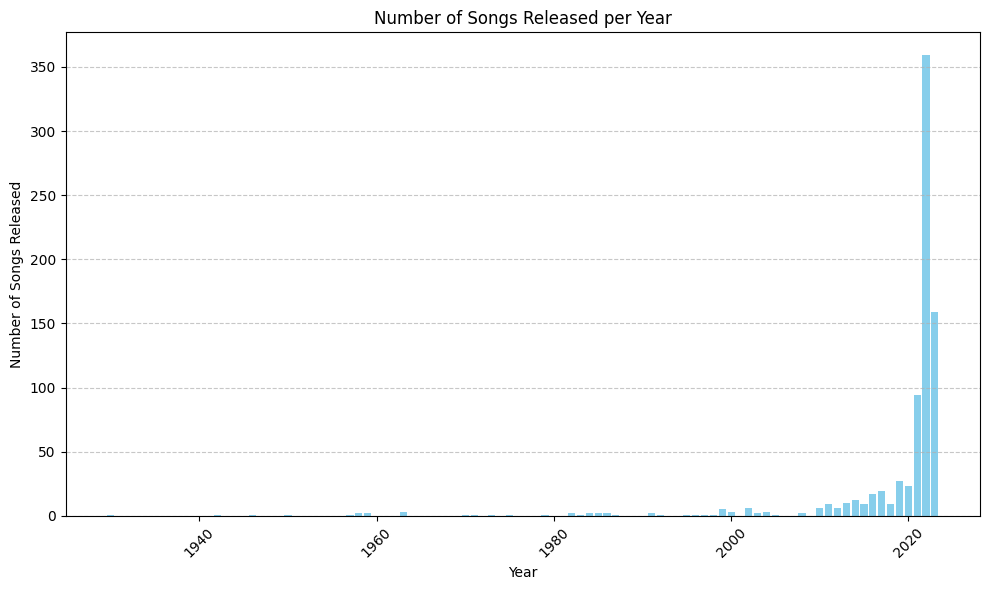

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(songs_per_year['released_year'], songs_per_year['song_count'], color='skyblue')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/Business_Intelligence_Final_Project_Jennifer_Lee.ipynb

[NbConvertApp] Converting notebook /content/Business_Intelligence_Final_Project_Jennifer_Lee.ipynb to html
[NbConvertApp] Writing 1383518 bytes to /content/Business_Intelligence_Final_Project_Jennifer_Lee.html
